In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd

In [5]:
#Importing dataset

games = pd.read_csv("games.csv")

In [6]:
#Understanding the data

print(games.columns)
print(games.shape)

Index(['id', 'type', 'name', 'yearpublished', 'minplayers', 'maxplayers',
       'playingtime', 'minplaytime', 'maxplaytime', 'minage', 'users_rated',
       'average_rating', 'bayes_average_rating', 'total_owners',
       'total_traders', 'total_wanters', 'total_wishers', 'total_comments',
       'total_weights', 'average_weight'],
      dtype='object')
(81312, 20)


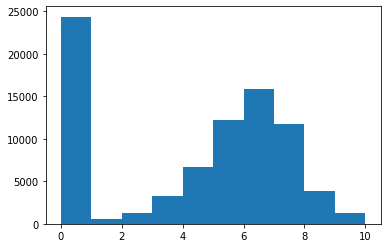

In [7]:
#Plotting histogram for average rating

plt.hist(games['average_rating'])
plt.show()

In [8]:
#Print first row of all games with zero rating

print(games[games['average_rating'] == 0].iloc[0])

#Print first row of all games with greater than zero rating

print(games[games['average_rating'] > 0].iloc[0])

id                             318
type                     boardgame
name                    Looney Leo
yearpublished                    0
minplayers                       0
maxplayers                       0
playingtime                      0
minplaytime                      0
maxplaytime                      0
minage                           0
users_rated                      0
average_rating                   0
bayes_average_rating             0
total_owners                     0
total_traders                    0
total_wanters                    0
total_wishers                    1
total_comments                   0
total_weights                    0
average_weight                   0
Name: 13048, dtype: object
id                                  12333
type                            boardgame
name                    Twilight Struggle
yearpublished                        2005
minplayers                              2
maxplayers                              2
playingtime          

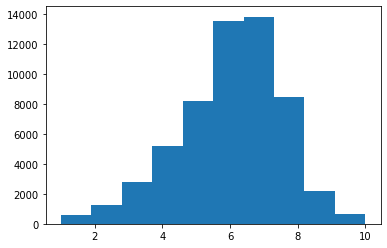

In [9]:
# Remove all games with no user rated

games = games[games['users_rated']>0]

# Remove rows with missing values

games = games.dropna(axis=0)

# Again check with histogram

plt.hist(games['average_rating'])
plt.show()

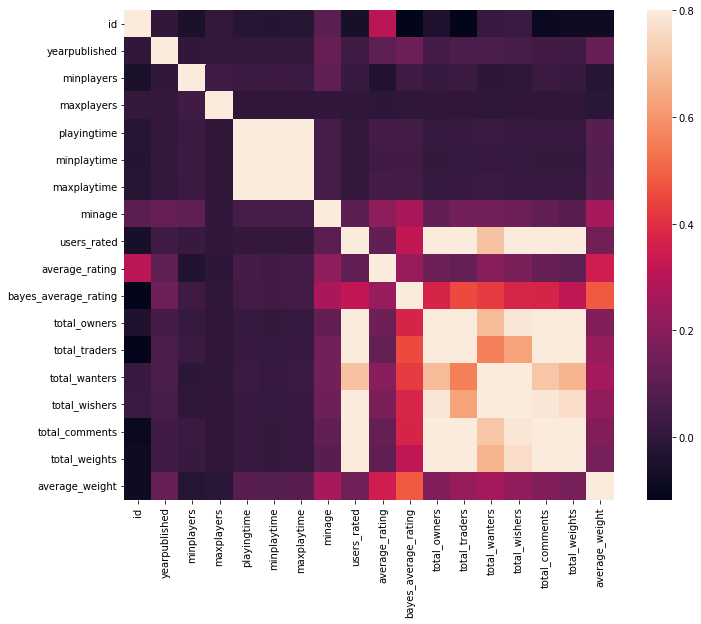

In [10]:
# Correlation Matrix

corrmat = games.corr()
fig = plt.figure(figsize = (12,9))

sns.heatmap(corrmat, vmax = 0.8, square = True)
plt.show()

In [12]:
# Remove unwanted columns and target column

columns = games.columns.tolist()
columns = [c for c in columns if c not in ["bayes_average_rating","average_rating","id","name","type"]]

target = "average_rating"

In [15]:
# Generate Training Set

train = games.sample(frac=0.8, random_state = 1)

# Generate Test Set

test = games.loc[~games.index.isin(train.index)]

# Print shapes

print(train.shape)
print(test.shape)

(45515, 20)
(11379, 20)


In [16]:
# Import Linear Regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Initialize Model Class

LR = LinearRegression()

# Fit the model with training data

LR.fit(train[columns], train[target])

LinearRegression()

In [17]:
# Generate Predictions for Test Data

predictions = LR.predict(test[columns])

# Compute mean squared error between predicted values and test data

mean_squared_error(predictions,test[target])

2.0787766414259927

In [18]:
# Import Random Forest Model

from sklearn.ensemble import RandomForestRegressor

# Initialise the model

RFR = RandomForestRegressor(n_estimators = 100, min_samples_leaf = 10, random_state = 1)

# Fit the model

RFR.fit(train[columns],train[target])

RandomForestRegressor(min_samples_leaf=10, random_state=1)

In [19]:
# Generate predictions

predictions = RFR.predict(test[columns])

# Compute mean squared error between predicted values and test data

mean_squared_error(predictions,test[target])

1.4458560046071653

In [20]:
# Predict for single game

chk = test[columns].iloc[0]

rating_LR = LR.predict(chk.values.reshape(1,-1))
rating_RFR = RFR.predict(chk.values.reshape(1,-1))
actual_rating = test[target].iloc[0]

print(chk)
print(rating_LR)
print(rating_RFR)
print(actual_rating)

yearpublished      2011.0000
minplayers            2.0000
maxplayers            6.0000
playingtime         200.0000
minplaytime          60.0000
maxplaytime         200.0000
minage               14.0000
users_rated       15709.0000
total_owners      17611.0000
total_traders       273.0000
total_wanters      1108.0000
total_wishers      5581.0000
total_comments     3188.0000
total_weights      1486.0000
average_weight        3.6359
Name: 9, dtype: float64
[8.12156602]
[7.91373581]
8.07933
